In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = pd.read_csv('Street_Tree_List.csv')
print(file)

        TreeID    qLegalStatus  \
0        48142  Permitted Site   
1        19725  DPW Maintained   
2       121399  DPW Maintained   
3        46536  Permitted Site   
4       251210  DPW Maintained   
...        ...             ...   
195756     231  DPW Maintained   
195757   92652  Permitted Site   
195758  108942  Permitted Site   
195759  143411  DPW Maintained   
195760   15238  DPW Maintained   

                                                 qSpecies           qAddress  \
0                                              Tree(s) ::                NaN   
1                                   Pinus Spp :: Pine Spp     100 STAIRWAY14   
2                 Corymbia ficifolia :: Red Flowering Gum     349X Cargo Way   
3                                              Tree(s) ::       73 Summer St   
4       Eucalyptus polyanthemos :: Silver Dollar Eucal...    1170 Ingalls St   
...                                                   ...                ...   
195756     Platanus x hispanica

This notebook describes data about the San Fransico, California street trees the city maintains including: planting date, species, and location.

Let's begin by getting a snapshot of the first five rows of data we will be working with. 

In [4]:
file.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,48142,Permitted Site,Tree(s) ::,NaN,252.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,07/17/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19725,DPW Maintained,Pinus Spp :: Pine Spp,100 STAIRWAY14,3.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,121399,DPW Maintained,Corymbia ficifolia :: Red Flowering Gum,349X Cargo Way,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46536,Permitted Site,Tree(s) ::,73 Summer St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,04/01/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,251210,DPW Maintained,Eucalyptus polyanthemos :: Silver Dollar Eucal...,1170 Ingalls St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,11/02/1992 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
isTree = file[file.PlantType == "Tree"]
print(isTree)

        TreeID    qLegalStatus  \
0        48142  Permitted Site   
1        19725  DPW Maintained   
2       121399  DPW Maintained   
3        46536  Permitted Site   
4       251210  DPW Maintained   
...        ...             ...   
195756     231  DPW Maintained   
195757   92652  Permitted Site   
195758  108942  Permitted Site   
195759  143411  DPW Maintained   
195760   15238  DPW Maintained   

                                                 qSpecies           qAddress  \
0                                              Tree(s) ::                NaN   
1                                   Pinus Spp :: Pine Spp     100 STAIRWAY14   
2                 Corymbia ficifolia :: Red Flowering Gum     349X Cargo Way   
3                                              Tree(s) ::       73 Summer St   
4       Eucalyptus polyanthemos :: Silver Dollar Eucal...    1170 Ingalls St   
...                                                   ...                ...   
195756     Platanus x hispanica

In [6]:
totalTrees=(isTree.PlantType.count())

Let's look at the total number of trees.

In [7]:
print(f'There are {totalTrees} in San Francisco, California.')

There are 195453 in San Francisco, California.


Next, let's take a closer look at how man unique zipcodes are included in the data.

In [8]:
uniqueZipcodes = file['Zip Codes'].unique()
print(uniqueZipcodes)

[   nan 28859. 28860. 29491. 28853. 29490.    58.   308. 28852.    57.
    54. 28861. 28858. 28855.    56.    55. 28856. 29492.   310. 28862.
    63.   309.    59. 28857.    64. 28854.    61.    62. 28588. 28590.]


Now, let's examine a histogram of the trees by zipcode. Histograms visualize frequency distributions.

In [9]:
treesByZipcode = file.groupby('Zip Codes')['TreeID']

In [10]:
treesByZipcode.count()

Zip Codes
54.0        9403
55.0        7410
56.0       10470
57.0        5626
58.0       12214
59.0        7359
61.0          32
62.0           4
63.0        9175
64.0        4566
308.0       4596
309.0       5418
310.0       1607
28588.0        7
28590.0        1
28852.0     6248
28853.0     8667
28854.0      309
28855.0     2494
28856.0     8852
28857.0     1273
28858.0     7515
28859.0    21286
28860.0     2365
28861.0    12865
28862.0    13008
29490.0     9687
29491.0     9610
29492.0    10611
Name: TreeID, dtype: int64

<AxesSubplot:xlabel='Zip Codes'>

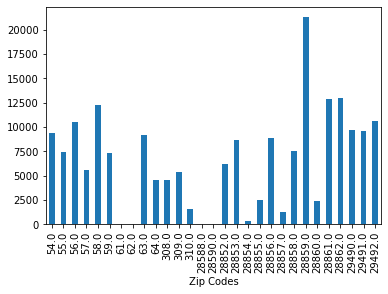

In [11]:
treesByZipcode.count().plot.bar()

<AxesSubplot:ylabel='Frequency'>

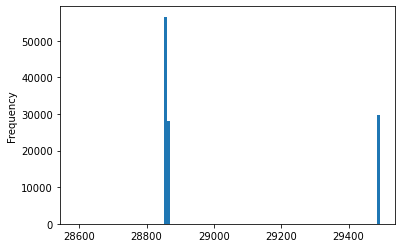

In [12]:
isZipcode = isTree[isTree['Zip Codes'] >= 28000]
isZipcode['Zip Codes'].plot.hist(by='Zip Codes', bins=100)

In [13]:
private = file[file.qCaretaker == "Private"]

In [14]:
DPW = file[file.qCaretaker == "DPW"]

In [20]:
caretaker = file.groupby('qCaretaker')['TreeID']

<AxesSubplot:xlabel='qCaretaker'>

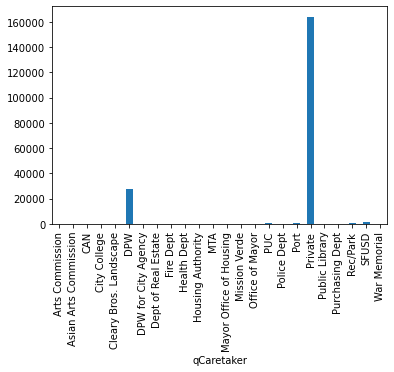

In [21]:
caretaker.count().plot.bar()